# Actividad Semanal -- 6, visualización

#Tecnológico de Monterrey
###Maestría en Inteligencia Artificial Aplicada
######Ciencia y analítica de datos
###### Profesor titular: Maria de la Paz Rico
###### Nancy Elena Estanislao Lizárraga - **A01169334**
######1 de noviembre del 2022




####**1) Descarga los datos y carga el dataset en tu libreta.**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import graphviz
import math
import pydotplus
import missingno as msno
import seaborn as sns  
import seaborn as load_dataset
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from scipy.stats import boxcox
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [48]:
path = "/content/sample_data/default of credit card clients.csv"
df = pd.read_csv(path)
df2 = pd.DataFrame(df)

####**2) Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

In [49]:
#Hay que poner yíyulos a las columnas, primero hacemos un arreglo y después las asignamos
df2.rename(columns = {
    'X1':'credito',
    'X2':'genero',
    'X3':'educacion',
    'X4':'estado_civil',
    'X5':'edad',
    'X6':'estat_sep',
    'X7':'estat_aug',
    'X8':'estat_jul',
    'X9':'estat_jun',
    'X10':'estat_may',
    'X11':'estat_apr',
    'X12':'montos_sep',
    'X13':'montos_aug',
    'X14':'montos_jul',
    'X15':'montos_jun',
    'X16':'montos_may',
    'X17':'montos_apr',
    'X18':'pagos_sep',
    'X19':'pagos_aug',
    'X20':'pagos_jul',
    'X21':'pagos_jun',
    'X22':'pagos_may',
    'X23':'pagos_apr',
 }, inplace = True)
df2.head()

,ID,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [50]:
df2.isnull().values.any()

True

In [51]:
df2.describe()

,ID,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            30000 non-null  int64  
 1   credito       30000 non-null  int64  
 2   genero        29999 non-null  float64
 3   educacion     29998 non-null  float64
 4   estado_civil  29998 non-null  float64
 5   edad          29995 non-null  float64
 6   estat_sep     29997 non-null  float64
 7   estat_aug     29995 non-null  float64
 8   estat_jul     29993 non-null  float64
 9   estat_jun     29991 non-null  float64
 10  estat_may     29984 non-null  float64
 11  estat_apr     29986 non-null  float64
 12  montos_sep    29989 non-null  float64
 13  montos_aug    29989 non-null  float64
 14  montos_jul    29987 non-null  float64
 15  montos_jun    29985 non-null  float64
 16  montos_may    29983 non-null  float64
 17  montos_apr    29990 non-null  float64
 18  pagos_sep     29992 non-nu

In [53]:
df2.shape

(30000, 25)

In [54]:
df2.dtypes

ID                int64
credito           int64
genero          float64
educacion       float64
estado_civil    float64
edad            float64
estat_sep       float64
estat_aug       float64
estat_jul       float64
estat_jun       float64
estat_may       float64
estat_apr       float64
montos_sep      float64
montos_aug      float64
montos_jul      float64
montos_jun      float64
montos_may      float64
montos_apr      float64
pagos_sep       float64
pagos_aug       float64
pagos_jul       float64
pagos_jun       float64
pagos_may       float64
pagos_apr       float64
Y               float64
dtype: object

In [55]:
df2.isna()

,ID,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


####**3) Limpia los datos eliminando los registros nulos o rellena con la media de la columna**

In [56]:
df2.isnull().values.any()

True

In [57]:

df3 = df2.copy()        
df3.dropna(inplace = True)     
df3.isna().values.any()  

False

In [58]:
df3

,ID,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


####**4) Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión**

In [59]:
df3.describe()

,ID,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


####**5) Realiza el conteo de las variables categóricas**

In [60]:
df2_cate = ['genero','educacion','estado_civil', 'estat_sep','estat_aug','estat_jul','estat_jun','estat_may','estat_apr']
#Columnas ordinales o discretas cuantitativas: 
df2_ord = ['']
#Columnas numéricas o cuantitativas: 
df2_num = ['credito', 'edad','montos_sep','montos_aug','montos_jul','montos_jun','montos_may','montos_apr','pagos_sep','pagos_aug','pagos_jul','pagos_jun','pagos_may','pagos_apr']
#Columnas binarias:
df2_bin = ['']


####**6) Escala los datos, si consideras necesario**

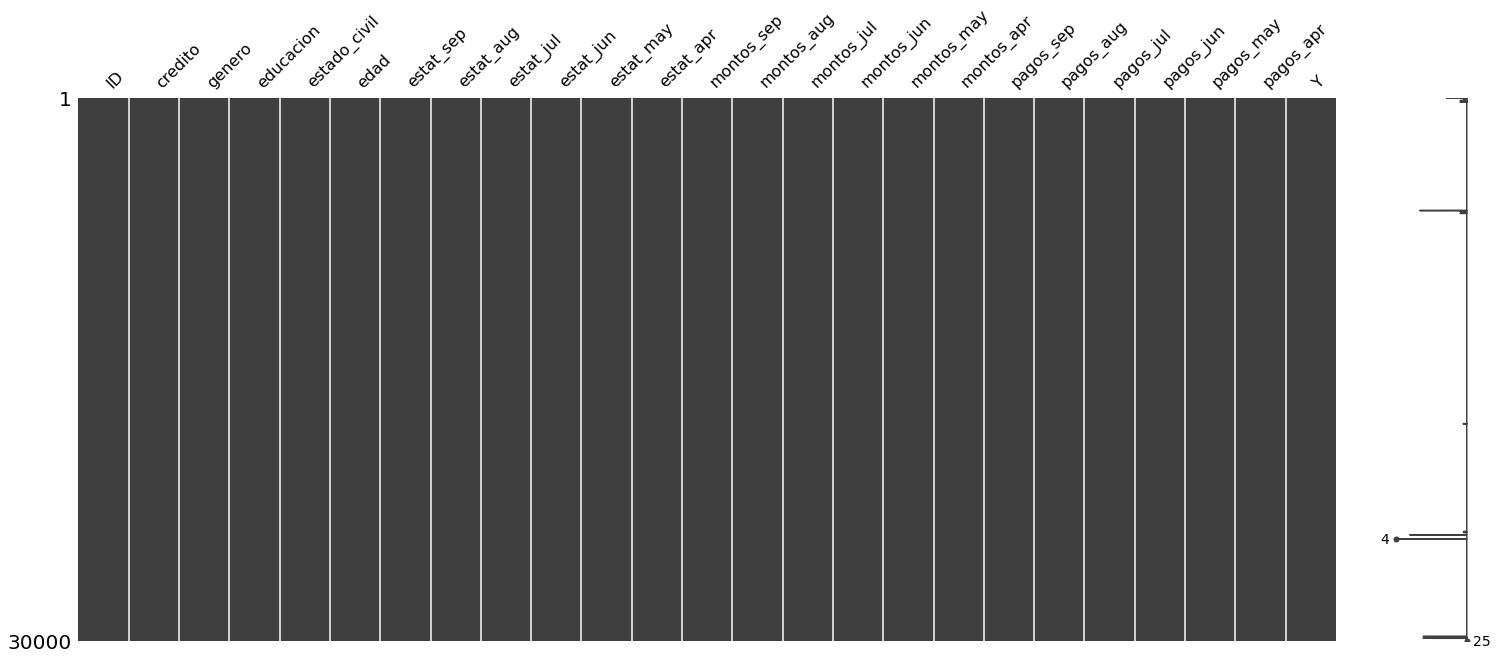

In [61]:
msno.matrix(df2)

In [76]:
num_pipeline = Pipeline(steps = [('impPromedio', SimpleImputer(strategy='mean')),
                                 ('log', FunctionTransformer(np.sqrt)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))])

TCC1_num = df2[df2_num].copy()

columnasTransformerNum = ColumnTransformer(transformers = [('numerical', num_pipeline, df2_num)])
TCC1Fit = columnasTransformerNum.fit(TCC1_num)
TCC1Transf = TCC1Fit.transform(TCC1_num)
TCC1Transf

array([[0.04602373, 0.07348625, 0.06369441, ..., 0.        , 0.        ,
        0.        ],
       [0.27378907, 0.11994648, 0.05273219, ..., 0.04012862, 0.        ,
        0.06150697],
       [0.22222222, 0.28994119, 0.17411158, ..., 0.04012862, 0.0484201 ,
        0.09725105],
       ...,
       [0.08133898, 0.34842538, 0.06079616, ..., 0.08223919, 0.06847637,
        0.07657556],
       [0.20315857, 0.42283088,        nan, ..., 0.05569066, 0.35238394,
        0.05841543],
       [0.13734089, 0.51090318, 0.22291823, ..., 0.04012862, 0.0484201 ,
        0.04349199]])

In [65]:
df_num1 = pd.DataFrame(TCC1Transf, columns = [df2_num])
df_num1

,credito,edad,montos_sep,montos_aug,montos_jul,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr
0,0.046024,0.073486,0.063694,0.056149,0.020348,0.000000,0.000000,0.000000,0.000000,0.020226,0.000000,0.000000,0.000000,0.000000
1,0.273789,0.119946,0.052732,0.041871,0.040146,0.060579,0.061044,0.058232,0.000000,0.024367,0.033407,0.040129,0.000000,0.061507
2,0.222222,0.289941,0.174112,0.119399,0.090266,0.126782,0.126973,0.127157,0.041686,0.029843,0.033407,0.040129,0.048420,0.097251
3,0.137341,0.348425,0.220724,0.221406,0.172106,0.178205,0.176731,0.175285,0.047849,0.034623,0.036595,0.042087,0.050063,0.043492
4,0.137341,0.689160,0.094520,0.075912,0.146746,0.153252,0.143701,0.141045,0.047849,0.147576,0.105642,0.120386,0.040192,0.035838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.410046,0.386105,0.442606,0.442678,0.353854,0.314174,0.183550,0.128907,0.098643,0.108971,0.074723,0.070047,0.108271,0.043492
29996,0.319220,0.458671,0.041772,0.043103,0.045874,0.100353,0.074818,0.000000,0.045857,0.045755,0.100210,0.014413,0.000000,0.000000
29997,0.081339,0.348425,0.060796,0.058402,0.040711,0.153025,0.148992,0.141875,0.000000,0.000000,0.156692,0.082239,0.068476,0.076576
29998,0.203159,0.422831,NaN,0.282239,0.214134,0.243292,0.113076,0.225599,0.313583,0.044989,0.036258,0.055691,0.352384,0.058415


####**7) Reduce las dimensiones con PCA, si consideras necesario.** 

*   Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
*   Indica la importancia de las variables en cada componente

In [77]:
df_num1.dropna(inplace = True)

In [78]:
pcs = PCA(n_components = .725) # AL SER >70% SE OPTÓ POR UN 72.5%

pcs.fit_transform(df_num1)

df_num1_transformed = pd.DataFrame(pcs.components_)



pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )

pcsSummary.columns = ['PC1','PC2','PC3']

pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

pcsSummary

,0,1,2
PC1,0.322546,0.186310,0.160991
PC2,0.541207,0.180573,0.134829
PC3,0.541207,0.721780,0.856609


In [79]:
print( pcs.explained_variance_  )
print(abs( pcs.components_ ))

[0.10403601 0.03471139 0.0259182 ]
[[0.18760995 0.03991063 0.41167385 0.41269936 0.31473676 0.41911299
  0.39789137 0.38200582 0.07989429 0.05638587 0.07683685 0.08990144
  0.10819817 0.09590166]
 [0.6314409  0.7453405  0.08072837 0.08770263 0.06290993 0.07799259
  0.06946657 0.05899487 0.03201435 0.02729046 0.03790582 0.04342923
  0.0620964  0.06516141]
 [0.71015164 0.66498833 0.07930082 0.08398007 0.05657299 0.05873126
  0.04762497 0.03653657 0.04885644 0.03909181 0.05739505 0.06656487
  0.0921006  0.09878392]]


####**8) Elabora los histogramas de los atributos para visualizar su distribución**

In [90]:
def plot_hist(TCC1_num):
  sns.set(rc={'figure.figsize':(60,5)})
  len_col = len(TCC1_num.columns)
  fig, axes = plt.subplots(1, len_col)
  for k in range(0,len_col):
    plt.subplot(1, len_col, k+1)
    plt.hist(df2[TCC1_num.columns[k]], bins=10)
    plt.xlabel(TCC1_num.columns[k])
  plt.show()

  TCC1_num.describe()

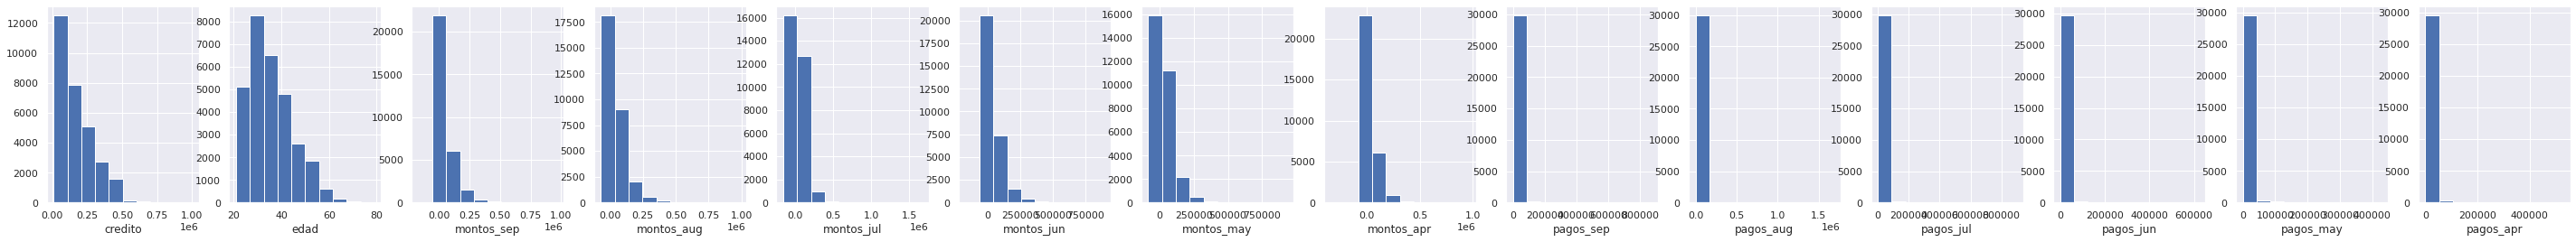

In [85]:
plot_hist(TCC1_num)

####**9)Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

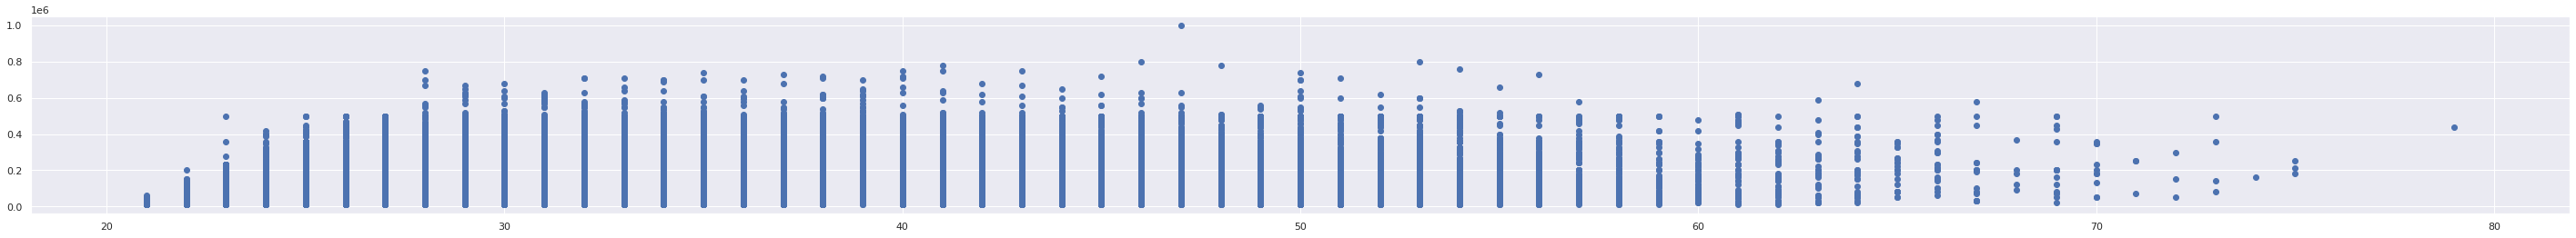

In [92]:
plt.scatter(TCC1_num.edad, TCC1_num.credito)
plt.show()

In [93]:
TCC1_num.describe()

,credito,edad,montos_sep,montos_aug,montos_jul,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr
count,30000.000000,29995.000000,29989.000000,29989.000000,2.998700e+04,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000
mean,167484.322667,35.484214,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,129747.661567,9.218024,73645.219278,71183.385123,6.936086e+04,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3565.000000,2986.000000,2.667500e+03,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000
50%,140000.000000,34.000000,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67139.000000,64027.000000,6.018200e+04,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


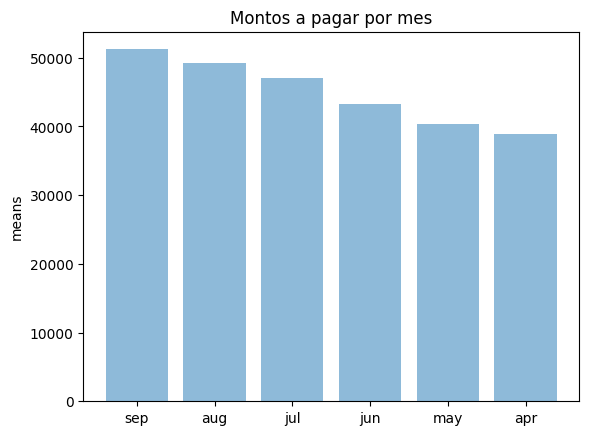

In [95]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ("sep", "aug", "jul", "jun","may","apr")
y_pos = np.arange(len(objects))
means = [TCC1_num.montos_sep.mean(), TCC1_num.montos_aug.mean(), TCC1_num.montos_jul.mean(), TCC1_num.montos_jun.mean(),TCC1_num.montos_may.mean(),TCC1_num.montos_apr.mean()]


plt.bar(y_pos, means, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('means')
plt.title('Montos a pagar por mes')

plt.show()

####**10) Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

En la primer gráfica podemos ver que la edad tiene mucho que ver para que te den elcrédito,  pues vemos que los datos comienzan a estar muy dispersos a partir de más de 60 años. También podemos ver que los montos a pagar por mes el más alto es cuando más deuda hay, en septiembre es cuando más deudas hay, será porque vamos a la mitad del año? porque es ormal que vaya creciendo, pero si, septiembre es el mes con mayores montos a pagar.
